# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [1]:
# Aqui realizo o import das bibliotecas que serão utilizadas neste documento.
# Pandas e numpy para analisar os dados.
# Seaborn e matplotlib para realizar o plot dos dados.

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [2]:
# Importando o arquivo CSV para o ambiente.
# Utilizo o método head para visualizar as primeiras linhas do csv.

arquivo = r"C:\Users\kenji\OneDrive\Documentos\EBAC\Ciêntista de dados\SINASC_RO_2019.csv"

sinasc_raw = pd.read_csv(arquivo)
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [3]:
# Utilizo o info() para visualizar se tem dados faltantes e qual o tipo das variáveis.

sinasc_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27028 entries, 0 to 27027
Data columns (total 69 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ORIGEM        27028 non-null  int64  
 1   CODESTAB      26913 non-null  float64
 2   CODMUNNASC    27028 non-null  int64  
 3   LOCNASC       27028 non-null  int64  
 4   IDADEMAE      27028 non-null  int64  
 5   ESTCIVMAE     26711 non-null  float64
 6   ESCMAE        26716 non-null  object 
 7   CODOCUPMAE    24121 non-null  float64
 8   QTDFILVIVO    25455 non-null  float64
 9   QTDFILMORT    24930 non-null  float64
 10  CODMUNRES     27028 non-null  int64  
 11  GESTACAO      25796 non-null  object 
 12  GRAVIDEZ      26949 non-null  object 
 13  PARTO         26979 non-null  object 
 14  CONSULTAS     27028 non-null  int64  
 15  DTNASC        27028 non-null  object 
 16  HORANASC      27007 non-null  float64
 17  SEXO          27024 non-null  object 
 18  APGAR1        26932 non-nu

# Tarefa 2

Os exercícios propostos instruem a utilizar o groupby, contudo pelo meu entendimento o melhor seria utilizar o pivot_table.

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [18]:
# Utilizo o describe para verificar as estatísticas descritivas do munResLat.

sinasc_raw[['munResLat']].describe()

,munResLat
count,27027.000000
mean,-10.377988
std,1.372942
min,-13.499760
25%,-11.433870
50%,-10.435950
75%,-8.768890
max,-8.768890


In [5]:
# Aloquei os dados que serão utilizados em uma variável.

sinasc = sinasc_raw[['munResLat', 'SEMAGESTAC', 'APGAR5']]

In [6]:
# Aplico o pd.cut para separar os dados de latitude em dois intervalos, menor que -10,5 e maior que 10,5.
# Com o describe verifiquei que o menor número é o -13,49 e o maior é -8,76. Esses valores são utilizados para criar o intervalo.

sinasc_lat = pd.cut(sinasc['munResLat'], [-13.5, -10.5, -8.6])
sinasc_lat

0        (-13.5, -10.5]
1        (-13.5, -10.5]
2        (-13.5, -10.5]
3        (-13.5, -10.5]
4        (-13.5, -10.5]
              ...      
27023    (-13.5, -10.5]
27024    (-13.5, -10.5]
27025    (-13.5, -10.5]
27026    (-13.5, -10.5]
27027    (-13.5, -10.5]
Name: munResLat, Length: 27028, dtype: category
Categories (2, interval[float64, right]): [(-13.5, -10.5] < (-10.5, -8.6]]

In [7]:
# Usando o pivot_table pego as variáveis desejadas, obtenho os valores desejados e coloco no index o intervalo de latitude.

sinasc.pivot_table(values=['SEMAGESTAC', 'APGAR5'],
                   index=[sinasc_lat],
                   aggfunc=['sum', 'mean', 'min', 'max', 'median', 'std', 'var'],
                   margins=True,
                   margins_name='Total'
                   )

sum                 mean               min             \
                  APGAR5 SEMAGESTAC    APGAR5 SEMAGESTAC APGAR5 SEMAGESTAC   
munResLat                                                                    
(-13.5, -10.5]  118393.0   482665.0  9.138788  38.545360    0.0       19.0   
(-10.5, -8.6]   128746.0   511951.0  9.216551  38.588302    0.0       21.0   
Total           235948.0   991381.0  9.179784  38.570634    0.0       19.0   

                  max            median                  std             \
               APGAR5 SEMAGESTAC APGAR5 SEMAGESTAC    APGAR5 SEMAGESTAC   
munResLat                                                                 
(-13.5, -10.5]   10.0       45.0    9.0       39.0  0.805381   2.012435   
(-10.5, -8.6]    10.0       45.0    9.0       39.0  0.774741   2.020722   
Total            10.0       45.0    9.0       39.0  0.784256   2.013142   

                     var             
                  APGAR5 SEMAGESTAC  
munResLat                            
(-13.5, -10.5]  0.648638   4.049895  
(-10.5, -8.6]   0.600224   4.083319  
Total           0.615058   4.052740

Aqui eu tentei relacionar o APGAR5 e as semanas de gestação com os intervalos de latitude.



*   Soma\
Ao meu ver não faz sentido analisar a soma, tanto do APGAR5 quanto das semanas de gestação;
*   Média\
Analisando a média não existe variações expressivas tanto no APGAR5 quanto as semanas de gestação, com relação à latitude;
*   Mínimo\
O mínimo para o APGAR5 e semana de gestação não variam com a latitude;
*   Máximo\
O máximo para o APGAR5 e semana de gestação não apresentam grande variação com a latitude;
*   Mediana\
A mediana para o APGAR5 e semana de gestação não variam com a latitude;
*   Desvio padrão\
A mediana para o APGAR5 e semana de gestação não apresentam grande variação com a latitude;
*   Variância\
A variância para o APGAR5 e semana de gestação não apresentam grande variação com a latitude.

De modo geral, a latitude não é uma variável determinante para essas variáveis.



### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [8]:
# Para esse segundo exercício eu repito o que foi feito no exercício anterior.
# Describe para determinar os intervalos.
# pd.cut para separar nos intervalos.
# pivot_table para agrupar os dados.

sinasc_raw[['munResArea']].describe()

,munResArea
count,27027.000000
mean,14702.799767
std,13706.177751
min,459.978000
25%,3792.998000
50%,6896.648000
75%,34096.394000
max,34096.394000


In [9]:
sinasc_area = pd.cut(sinasc_raw['munResArea'], [459, 3000, 34097])
sinasc_area

0        (3000, 34097]
1        (3000, 34097]
2        (3000, 34097]
3        (3000, 34097]
4        (3000, 34097]
             ...      
27023    (3000, 34097]
27024    (3000, 34097]
27025    (3000, 34097]
27026    (3000, 34097]
27027      (459, 3000]
Name: munResArea, Length: 27028, dtype: category
Categories (2, interval[int64, right]): [(459, 3000] < (3000, 34097]]

In [10]:
sinasc_raw.pivot_table(values=['QTDPARTNOR', 'QTDPARTCES'],
                   index=[sinasc_area],
                   aggfunc=['sum', 'mean', 'min', 'max', 'median', 'std', 'var'],
                   margins=True,
                   margins_name='Total'
                   )

sum                  mean                   min  \
              QTDPARTCES QTDPARTNOR QTDPARTCES QTDPARTNOR QTDPARTCES   
munResArea                                                             
(459, 3000]       2952.0     1912.0   0.572981   0.371334        0.0   
(3000, 34097]    10184.0    12659.0   0.507070   0.632982        0.0   
Total            12595.0    13896.0   0.507229   0.559623        0.0   

                                max                median             \
              QTDPARTNOR QTDPARTCES QTDPARTNOR QTDPARTCES QTDPARTNOR   
munResArea                                                             
(459, 3000]          0.0        5.0       10.0        0.0        0.0   
(3000, 34097]        0.0       12.0       41.0        0.0        0.0   
Total                0.0       12.0       40.0        0.0        0.0   

                     std                   var             
              QTDPARTCES QTDPARTNOR QTDPARTCES QTDPARTNOR  
munResArea                                                 
(459, 3000]     0.749368   0.856441   0.561553   0.733490  
(3000, 34097]   0.744981   1.278932   0.554997   1.635668  
Total           0.741401   1.142054   0.549676   1.304288

Aqui eu tentei relacionar a quantidade de partos normais e partos cesária com o tamanho do município.



*   Soma\
Ao analisar a soma verifica-se que a quantidade de partos normais e cesária é maior em municícipios com mais de 3.000 m².
*   Média\
A média de partos cesária e normais em municípios menores que 3.000 m² é bem proxima, mas em municípios mairores a média de partos normais se torna mais expressiva do que cesárias em municípios maiores.
*   Mínimo\
A quantidade mínima tanto de partos cesária quanto partos normais não varia com o tamnanho do município.
*   Máximo\
Em municípios maiores que 3.000m² o máximo de partos é maior tanto nas cesárias quanto nos partos normais.
*   Mediana\
A mediana não varia, sendo zero, tanto para partos normais quanto partos cesária, independemente do tamanho do município.
*   Desvio padrão\
O desvio padrão da quantidade de partos em municípios maiores é quase o 50% maior do que em municípios menores.
*   Variância\
A variância para partos normais em municípios mais é mais que 100% maior que em municípios menores.

De modo geral, em municípios maiores temos uma maior quantidade de partos, tanto cesária, quanto normal, o que leva à uma maior variação da quantidade de partos, elevando o valor da variância e desvio padrão.

### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [11]:
# Mesma coisa do que foi realizado nos exercícios acima.
# Contudo, diferentemente dos exercícios anteriores não é fornecido o intervalo.
# Decidi usar como intervalo os quartis.

sinasc_raw[['munResAlt']].describe()

,munResAlt
count,27027.000000
mean,179.111999
std,123.138365
min,85.000000
25%,87.000000
50%,153.000000
75%,191.000000
max,595.000000


In [12]:
sinasc_alt = pd.cut(sinasc_raw['munResAlt'], [85, 87, 153, 191, 595])

In [13]:
sinasc_raw.pivot_table(values=['QTDGESTANT', 'CONSULTAS'],
                   index=[sinasc_alt],
                   aggfunc=['sum', 'mean', 'min', 'max', 'median', 'std', 'var'],
                   margins=True,
                   margins_name='Total'
                   )

sum                 mean                  min             \
           CONSULTAS QTDGESTANT CONSULTAS QTDGESTANT CONSULTAS QTDGESTANT   
munResAlt                                                                   
(85, 87]       28122    10739.0  3.333175   1.443414         1        0.0   
(87, 153]      17294     6568.0  3.567244   1.380412         1        0.0   
(153, 191]     25991     7790.0  3.746180   1.128986         1        0.0   
(191, 595]     24092     7300.0  3.725375   1.138490         1        0.0   
Total          92554    32918.0  3.585141   1.275101         1        0.0   

                 max               median                  std             \
           CONSULTAS QTDGESTANT CONSULTAS QTDGESTANT CONSULTAS QTDGESTANT   
munResAlt                                                                   
(85, 87]           9       14.0         4        1.0  0.982206   1.445156   
(87, 153]          9       52.0         4        1.0  0.740259   1.715371   
(153, 191]         9       10.0         4        1.0  0.580052   1.229511   
(191, 595]         9       12.0         4        1.0  0.620341   1.216856   
Total              9       52.0         4        1.0  0.780919   1.404597   

                 var             
           CONSULTAS QTDGESTANT  
munResAlt                        
(85, 87]    0.964728   2.088477  
(87, 153]   0.547984   2.942496  
(153, 191]  0.336460   1.511698  
(191, 595]  0.384823   1.480739  
Total       0.609834   1.972893

Para realizar essa análise selecionei a quantidade de gestantes e as consultas realizadas.
Utilizei os quartis para realizar a divisão das altitudes.

Analisando a soma verifica-se que a quantidade de gestantes em municípios na menor faixa de altitude é maior do que os demais municípios. O mesmo se repete para as consultas.

A média da quantidade de gestantes nos municípios com menor altitude é ligeiramente maior que os demais.

O mesmo não se repete no mínimo e no máximo. No mínimo não é verificada nenhuma variação dos dados, já para o máximo verifica-se que a segunda faixa apresenta um máximo muito maior que os demais. Muito provável que esse valor seja um outlier, e também possa ser um erro de digitação.

Assim como o mínimo, a mediana não apresenta variação com relação às faixas de altitude.

Observa-se que variância e o desvio padrão são maiores na primeira faixa de altitude, com exceção da quantidade de gestantes. A quantidade de gestantes apresenta uma variância e desvio padão maior na segunda faixa, onde se identificou um provável outlier e possivelmente um erro de digitação.

### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia
https://pt.wikipedia.org/wiki/Lista_de_regi%C3%B5es_geogr%C3%A1ficas_intermedi%C3%A1rias_e_imediatas_de_Rond%C3%B4nia

In [14]:
# Aqui eu uso o mapping para separar os municípios por região imediata.

mapping = {
    'Candeias do Jamari': 'Porto Velho',
    'Guajará-Mirim': 'Porto Velho',
    'Itapuã do Oeste': 'Porto Velho',
    'Nova Mamoré': 'Porto Velho',
    'Porto Velho': 'Porto Velho',
    'Alto Paraíso': 'Ariquemes',
    'Ariquemes': 'Ariquemes',
    'Buritis': 'Ariquemes',
    'Cacaulândia': 'Ariquemes',
    'Campo Novo de Rondônia': 'Ariquemes',
    'Cujubim': 'Ariquemes',
    'Monte Negro': 'Ariquemes',
    'Rio Crespo': 'Ariquemes',
    'Governador Jorge Teixeira': 'Jaru',
    'Jaru': 'Jaru',
    "Machadinho d'Oeste": 'Jaru',
    'Theobroma': 'Jaru',
    'Vale do Anari': 'Jaru',
    "Alvorada d'Oeste": 'Ji-Paraná',
    'Costa Marques': 'Ji-Paraná',
    'Ji-Paraná': 'Ji-Paraná',
    'Mirante da Serra': 'Ji-Paraná',
    'Nova União': 'Ji-Paraná',
    'Ouro Preto do Oeste': 'Ji-Paraná',
    'Presidente Médici': 'Ji-Paraná',
    'São Francisco do Guaporé': 'Ji-Paraná',
    'São Miguel do Guaporé': 'Ji-Paraná',
    'Seringueiras': 'Ji-Paraná',
    'Teixeirópolis': 'Ji-Paraná',
    'Urupá': 'Ji-Paraná',
    'Vale do Paraíso': 'Ji-Paraná',
    "Alta Floresta d'Oeste": 'Cacoal',
    'Alto Alegre dos Parecis': 'Cacoal',
    'Cacoal': 'Cacoal',
    'Castanheiras': 'Cacoal',
    "Espigão d'Oeste": 'Cacoal',
    'Ministro Andreazza': 'Cacoal',
    "Nova Brasilândia d'Oeste": 'Cacoal',
    'Novo Horizonte do Oeste': 'Cacoal',
    'Parecis': 'Cacoal',
    'Pimenta Bueno': 'Cacoal',
    'Primavera de Rondônia': 'Cacoal',
    'Rolim de Moura': 'Cacoal',
    "Santa Luzia d'Oeste": 'Cacoal',
    "São Felipe d'Oeste": 'Cacoal',
    'Cabixi': 'Vilhena',
    'Cerejeiras': 'Vilhena',
    'Chupinguaia': 'Vilhena',
    'Colorado do Oeste': 'Vilhena',
    'Corumbiara': 'Vilhena',
    'Pimenteiras do Oeste': 'Vilhena',
    'Vilhena': 'Vilhena'
}

In [15]:
# Defino como index munResNome

sinasc_1 = sinasc_raw.set_index('munResNome')

In [16]:
# Aqui eu verifico como vão ficar meus dados antes de plotar.
# Aqui separamos a IDADEMAE para cada data e região imediata

sinasc_1.groupby(['DTNASC', mapping])['IDADEMAE'].mean().sort_values().unstack()

munResNome,Ariquemes,Cacoal,Jaru,Ji-Paraná,Porto Velho,Vilhena
DTNASC,,,,,,
2019-01-01,23.200000,23.200000,31.000000,24.142857,21.388889,27.750000
2019-01-02,26.166667,26.500000,31.000000,25.545455,26.050000,28.727273
2019-01-03,24.142857,27.750000,26.000000,27.000000,26.638889,23.375000
2019-01-04,24.666667,23.222222,22.500000,23.125000,28.814815,26.000000
2019-01-05,22.888889,22.750000,24.000000,27.100000,27.250000,28.200000
...,...,...,...,...,...,...
2019-12-27,24.666667,22.769231,25.333333,27.466667,28.410256,27.000000
2019-12-28,23.833333,22.142857,24.800000,26.000000,26.291667,22.666667
2019-12-29,23.166667,25.250000,24.666667,24.125000,25.470588,24.250000


Text(0, 0.5, 'Idade Média Mãe')

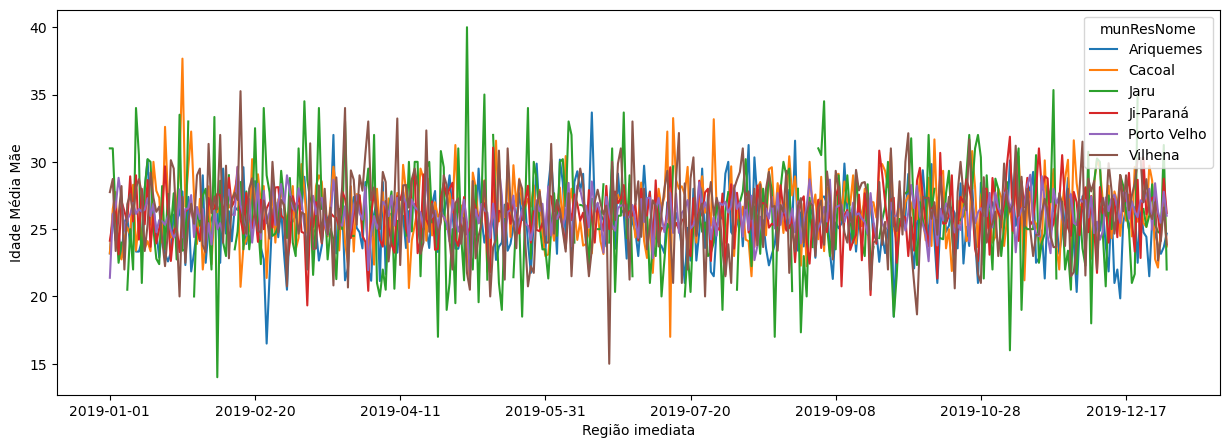

In [17]:
# Aqui só realizo o plot do que fiz no bloco anterior e defino o nome dos eixos.

sinasc_1.groupby(['DTNASC', mapping])['IDADEMAE'].mean().sort_values().unstack().plot(figsize=[15, 5])
plt.xlabel('Data')
plt.ylabel('Idade Média Mãe')

### Observações

No gráfico percebe-se que a média das regiões está entre 20 e 30 anos.\
Em Jaru é observado a menor e a maior idade das mães, perto de 15 e 40 anos, respectivamente.

### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


In [23]:
# Criando outro mapping

mapping_1 = {
    'Porto Velho': 'IDH alto',
    'Vilhena': 'IDH alto',
    'Cacoal': 'IDH alto',
    'Ji-Paraná': 'IDH alto',
    'Pimenta Bueno': 'IDH alto',
    'Ariquemes': 'IDH alto',
    'Rolim de Moura': 'IDH alto',
    'Cerejeiras': 'IDH médio',
    'Jaru': 'IDH médio',
    'Colorado do Oeste': 'IDH médio',
    'Ouro Predo do Oeste': 'IDH médio',
    "Espigão d'Oeste": 'IDH médio',
    "Santa Luzia d'Oeste": 'IDH médio',
    'Pimenteiras do Oeste': 'IDH médio',
    'Presidente Médici': 'IDH médio',
    'Castanheiras': 'IDH médio',
    'Guajará-Mirim': 'IDH médio',
    'Chupinguaia': 'IDH médio',
    'Cabixi': 'IDH médio',
    'Candeias do Jamari': 'IDH médio',
    "São Felipe d'Oeste": 'IDH médio',
    'Cacaulândia': 'IDH médio',
    'São Miguel do Guaporé': 'IDH médio',
    'Mirante da Serra': 'IDH médio',
    "Alvorada d'Oeste": 'IDH médio',
    'Teixeirópolis': 'IDH médio',
    "Nova Brasilândia d'Oeste": 'IDH médio',
    'Rio Crespo': 'IDH médio',
    'Primavera de Rondônia': 'IDH médio',
    "Alta Floresta d'Oeste": 'IDH médio',
    'Ministro Andreazza': 'IDH médio',
    'Novo Horizonte do Oeste': 'IDH médio',
    'Vale do Paraíso': 'IDH médio',
    'Alto Paraíso': 'IDH médio',
    'Parecis': 'IDH médio',
    'Buritis': 'IDH médio',
    'Itapuã do Oeste': 'IDH médio',
    'Corumbiara': 'IDH médio',
    'Cujubim': 'IDH médio',
    'Costa Marques': 'IDH médio',
    'São Francisco do Guaporé': 'IDH médio',
    'Urupá': 'IDH médio',
    'Monte Negro': 'IDH médio',
    'Seringueiras': 'IDH báixo',
    'Governador Jorge Teixeira': 'IDH báixo',
    "Machadinho d'Oeste": 'IDH báixo',
    'Campo Novo de Rondônia': 'IDH báixo',
    'Alto Alegre dos Parecis': 'IDH báixo',
    'Theobroma': 'IDH báixo',
    'Nova União': 'IDH báixo',
    'Nova Mamoré': 'IDH báixo',
    'Vale do Anari': 'IDH báixo',
}

In [32]:
sinasc_1.groupby(mapping_1)[['IDADEMAE', 'IDADEPAI']].agg(['mean', 'median', 'std', 'max', 'min'])

IDADEMAE                            IDADEPAI                   \
                 mean median       std max min       mean median       std   
munResNome                                                                   
IDH alto    26.280332   26.0  6.415374  47  12  31.074091   30.0  7.773149   
IDH báixo   25.269231   25.0  6.103193  46  13  30.402332   30.0  7.141936   
IDH médio   25.795190   25.0  6.341390  53  11  31.662261   31.0  7.950649   

                        
             max   min  
munResNome              
IDH alto    70.0  15.0  
IDH báixo   58.0  16.0  
IDH médio   73.0  16.0

Analisando os dados não se verifica uma diferença expressiva na IDADEMAE e IDADEPAI em relação ao índice de IDH.\
Eu esperava que a média seria maior no grupo com IDH mais elevado.

### 5.2 IFDM
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


In [33]:
mapping_2 = {
    "Ariquemes": 'Desenvolvimento Moderado',
    "Vilhena": 'Desenvolvimento Moderado',
    "Pimenta Bueno": 'Desenvolvimento Moderado',
    "Porto Velho": 'Desenvolvimento Moderado',
    "Ji-Paraná": 'Desenvolvimento Moderado',
    "Cacoal": 'Desenvolvimento Moderado',
    "Santa Luzia d'Oeste": 'Desenvolvimento Moderado',
    "Rolim de Moura": 'Desenvolvimento Moderado',
    "Chupinguaia": 'Desenvolvimento Moderado',
    "São Miguel do Guaporé": 'Desenvolvimento Moderado',
    "Pimenteiras do Oeste": 'Desenvolvimento Moderado',
    "Teixeirópolis": 'Desenvolvimento Moderado',
    "Colorado do Oeste": 'Desenvolvimento Moderado',
    "Jaru": 'Desenvolvimento Moderado',
    "Rio Crespo": 'Desenvolvimento Moderado',
    "Primavera de Rondônia": 'Desenvolvimento Moderado',
    "Alta Floresta d'Oeste": 'Desenvolvimento Moderado',
    "Ouro Preto do Oeste": 'Desenvolvimento Moderado',
    "São Francisco do Guaporé": 'Desenvolvimento Moderado',
    "Candeias do Jamari": 'Desenvolvimento Moderado',
    "Buritis": 'Desenvolvimento Moderado',
    "São Felipe d'Oeste": 'Desenvolvimento Moderado',
    "Presidente Médici": 'Desenvolvimento Moderado',
    "Cerejeiras": 'Desenvolvimento Moderado',
    "Monte Negro": 'Desenvolvimento Moderado',
    "Urupá": 'Desenvolvimento Moderado',
    "Espigão d'Oeste": 'Desenvolvimento Regular',
    "Seringueiras": 'Desenvolvimento Regular',
    "Alvorada d'Oeste": 'Desenvolvimento Regular',
    "Itapuã do Oeste": 'Desenvolvimento Regular',
    "Cabixi": 'Desenvolvimento Regular',
    "Novo Horizonte do Oeste": 'Desenvolvimento Regular',
    "Nova Brasilândia d'Oeste": 'Desenvolvimento Regular',
    "Vale do Paraíso": 'Desenvolvimento Regular',
    "Corumbiara": 'Desenvolvimento Regular',
    "Alto Paraíso": 'Desenvolvimento Regular',
    "Cacaulândia": 'Desenvolvimento Regular',
    "Vale do Anari": 'Desenvolvimento Regular',
    "Ministro Andreazza": 'Desenvolvimento Regular',
    "Costa Marques": 'Desenvolvimento Regular',
    "Nova União": 'Desenvolvimento Regular',
    "Guajará-Mirim": 'Desenvolvimento Regular',
    "Mirante da Serra": 'Desenvolvimento Regular',
    "Parecis": 'Desenvolvimento Regular',
    "Castanheiras": 'Desenvolvimento Regular',
    "Theobroma": 'Desenvolvimento Regular',
    "Machadinho d'Oeste": 'Desenvolvimento Regular',
    "Campo Novo de Rondônia": 'Desenvolvimento Regular',
    "Nova Mamoré": 'Desenvolvimento Regular',
    "Cujubim": 'Desenvolvimento Regular',
    "Alto Alegre dos Parecis": 'Desenvolvimento Regular',
    "Governador Jorge Teixeira": 'Desenvolvimento Regular'
}

In [36]:
sinasc_1.groupby(mapping_2)[['IDADEMAE', 'IDADEPAI']].agg(['mean', 'median', 'std', 'max', 'min'])

IDADEMAE                            IDADEPAI  \
                               mean median       std max min       mean   
munResNome                                                                
Desenvolvimento Moderado  26.226921   26.0  6.388564  53  12  31.145206   
Desenvolvimento Regular   25.412005   25.0  6.376854  52  11  31.345297   

                                                       
                         median       std   max   min  
munResNome                                             
Desenvolvimento Moderado   30.0  7.741017  70.0  15.0  
Desenvolvimento Regular    30.0  7.975385  73.0  16.0

Assim como no item anterior não se verifica uma variação expressiva para os dados em relação ao IFDM.

### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


In [38]:
mapping_3 = {
    "Porto Velho": 'Acima de 1 bilhão',
    "Ji-Paraná": 'Acima de 1 bilhão',
    "Vilhena": 'Acima de 1 bilhão',
    "Ariquemes": 'Acima de 1 bilhão',
    "Cacoal": 'Acima de 1 bilhão',
    "Jaru": 'Acima de 1 bilhão',
    "Rolim de Moura": 'Acima de 1 bilhão',
    "Pimenta Bueno": 'Acima de 1 bilhão',
    "Guajará-Mirim": 'Acima de 500 milhões',
    "Ouro Preto do Oeste": 'Acima de 500 milhões',
    "Buritis": 'Acima de 500 milhões',
    "Machadinho do Oeste": 'Acima de 500 milhões',
    "Espigão d'Oeste": 'Acima de 500 milhões',
    "São Miguel do Guaporé": 'Acima de 500 milhões',
    "Candeias do Jamari": 'Acima de 500 milhões',
    "Nova Mamoré": 'Acima de 500 milhões',
    "Cerejeiras": 'Acima de 500 milhões',
    "Alta Floresta do Oeste": 'Acima de 300 milhões',
    "Presidente Médici": 'Acima de 300 milhões',
    "Cujubim": 'Acima de 300 milhões',
    "Nova Brasilândia do Oeste": 'Acima de 300 milhões',
    "Alto Paraíso": 'Acima de 300 milhões',
    "São Francisco do Guaporé": 'Acima de 300 milhões',
    "Colorado do Oeste": 'Acima de 300 milhões',
    "Monte Negro": 'Acima de 200 milhões',
    "Alto Alegre dos Parecis": 'Acima de 200 milhões',
    "Campo Novo de Rondônia": 'Acima de 200 milhões',
    "Alvorada do Oeste": 'Acima de 200 milhões',
    "Chupinguaia": 'Acima de 100 milhões',
    "Corumbiara": 'Acima de 100 milhões',
    "Ministro Andreazza": 'Acima de 100 milhões',
    "Urupá": 'Acima de 100 milhões',
    "Costa Marques": 'Acima de 100 milhões',
    "Seringueiras": 'Acima de 100 milhões',
    "Mirante da Serra": 'Acima de 100 milhões',
    "Governador Jorge Teixeira": 'Acima de 100 milhões',
    "Theobroma": 'Acima de 100 milhões',
    "Santa Luzia do Oeste": 'Acima de 100 milhões',
    "Novo Horizonte do Oeste": 'Acima de 100 milhões',
    "Itapuã do Oeste": 'Acima de 100 milhões',
    "Vale do Paraíso": 'Acima de 100 milhões',
    "Cacaulândia": 'Acima de 100 milhões',
    "Cabixi": 'Acima de 100 milhões',
    "Vale do Anari": 'Acima de 100 milhões',
    "Nova União": 'Até 100 milhões',
    "Parecis": 'Até 100 milhões',
    "Rio Crespo": 'Até 100 milhões',
    "Pimenteiras do Oeste": 'Até 100 milhões',
    "Teixeirópolis": 'Até 100 milhões',
    "São Felipe do Oeste": 'Até 100 milhões',
    "Castanheiras": 'Até 100 milhões',
    "Primavera de Rondônia": 'Até 100 milhões'
}

In [39]:
sinasc_1.groupby(mapping_3)[['IDADEMAE', 'IDADEPAI']].agg(['mean', 'median', 'std', 'max', 'min'])

IDADEMAE                            IDADEPAI         \
                           mean median       std max min       mean median   
munResNome                                                                   
Acima de 1 bilhão     26.265562   26.0  6.403777  47  12  31.108387   30.0   
Acima de 100 milhões  25.638424   25.0  6.324801  52  12  31.744348   31.0   
Acima de 200 milhões  25.146435   25.0  5.905771  41  13  30.187500   29.0   
Acima de 300 milhões  25.706070   25.0  6.344987  47  11  30.819149   30.0   
Acima de 500 milhões  25.785927   25.0  6.479551  53  13  31.381955   31.0   
Até 100 milhões       26.519894   26.0  5.877767  41  14  31.626126   30.0   

                                            
                           std   max   min  
munResNome                                  
Acima de 1 bilhão     7.767477  70.0  15.0  
Acima de 100 milhões  8.008643  73.0  17.0  
Acima de 200 milhões  7.659388  55.0  16.0  
Acima de 300 milhões  7.858123  64.0  16.0  
Acima de 500 milhões  7.583172  60.0  17.0  
Até 100 milhões       7.665510  67.0  17.0

Aqui também não se verifica grandes alterações com a IDADEMAE e IDADEPAI com relação ao PIB.

### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios com o PIB mais alto é a maior dentre todas.